In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset

In [322]:

%matplotlib inline


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams["axes.labelsize"] = 15


df = getNormalizedDataset()
df.shape
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year
df['antiguedad'] = df['antiguedad'] + (2016 - df['año']) # Se normaliza la antiguedad.

(230396, 18)
(230060, 18)
(230041, 18)
(220417, 19)


In [323]:

# Resulta interesante entonces que el comportamiento de la Oficina comercial y el del local comercial son similares.
# Mientras que el de el terreno comercial y la bodega comercial tambien son similares.

# Entonces se toma la decision de agrupar oficina comercial y local comercial, bodega comercial y terreno comercial.
# Se remueven todas las otras propiedades.

df.loc[df['tipodepropiedad'] == 'Oficina comercial', ['tipodepropiedad']] = 'Local Comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', ['tipodepropiedad']] = 'Terreno comercial'
df3 = df.groupby('tipodepropiedad').agg(promedio_m2=('precio_m2','mean'), tamano=('tipodepropiedad', 'size')).reset_index()
propiedades_validas = df3[df3['tamano'] > 1000].tipodepropiedad.unique().to_list()

df = df[df['tipodepropiedad'].isin(propiedades_validas)]
df['tipodepropiedad'].cat.remove_unused_categories(inplace=True)
df['tipodepropiedad'].unique()


[Apartamento, Casa en condominio, Casa, Terreno, Local Comercial, Terreno comercial]
Categories (6, object): [Apartamento, Casa en condominio, Casa, Terreno, Local Comercial, Terreno comercial]

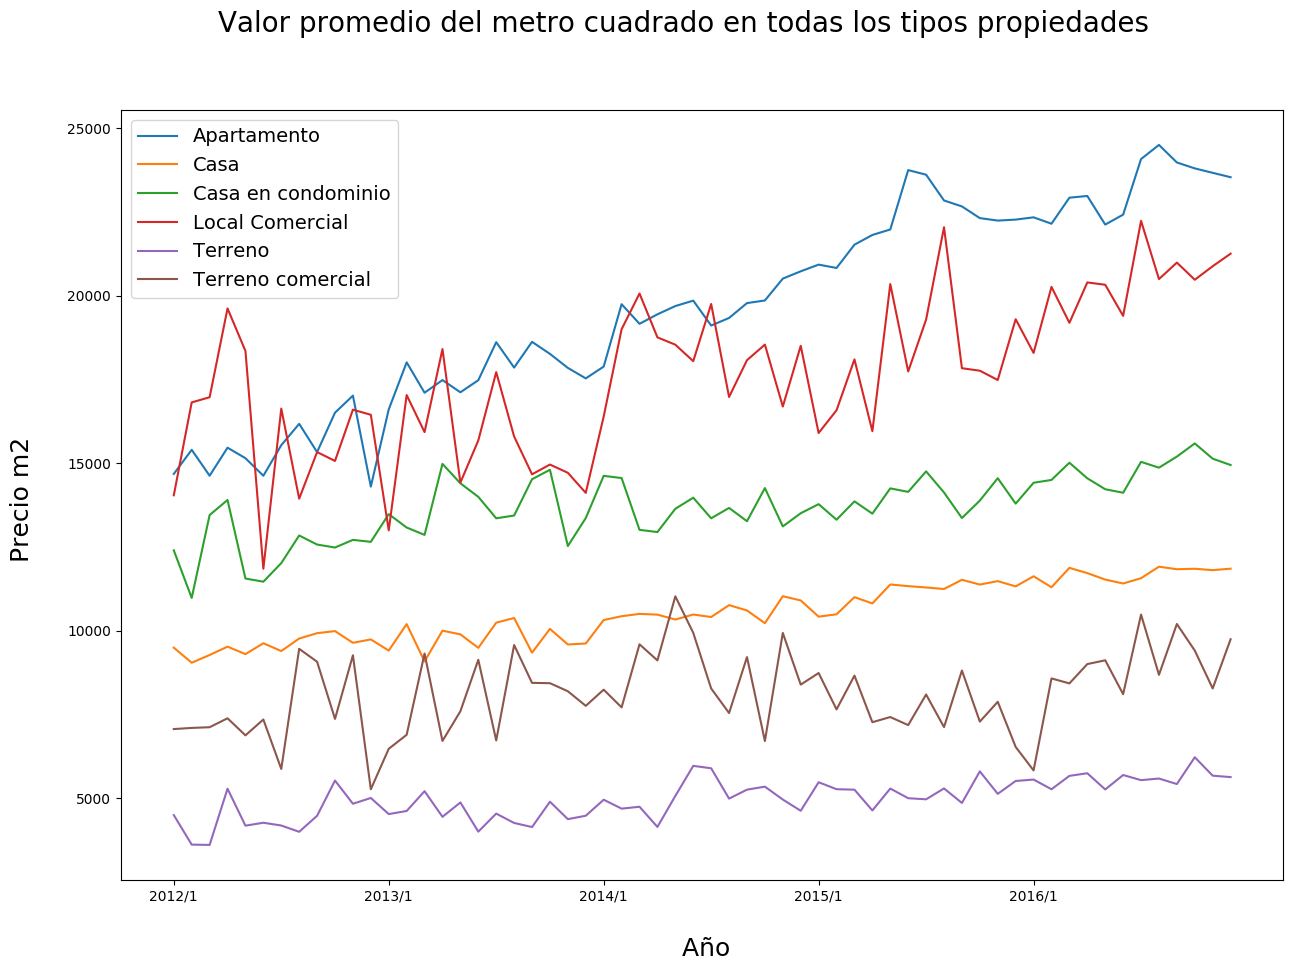

In [295]:
# Teniendo un data set un poco mas uniforme en tipo de propiedades. Grafiquemos la evolucion
# del costo de cada tipo de propiedad historicamente.
df['tipodepropiedad'].cat.categories
# df.shape
fig, ax1 = plt.subplots(1,1, figsize=(15,10))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado en todas los tipos propiedades',fontsize=20)

dfprop = df.groupby(['año', 'mes', 'tipodepropiedad']).agg(precio_m2=('precio_m2', 'mean')).reset_index()

copydf = df.copy()
copydf['dia'] = 1

dfprop['fecha'] = dfprop['año'].map(str) +'/'+ dfprop['mes'].map(str)
dfprop

# for name, nam2, group in dfprop:
#     print(name)


for i in dfprop.tipodepropiedad.cat.categories: 
    dfplot = dfprop[dfprop['tipodepropiedad'] == i]
    ax1.plot(dfplot.fecha,\
            dfplot.precio_m2,\
            label=i)

plt.xticks(['2012/1','2013/1','2014/1','2015/1','2016/1'])    
ax1.set_xlabel("\n Año", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', title_fontsize=16, fontsize=14)


In [296]:
df.shape

(217404, 23)

Text(0.5, 1.05, 'Regresión del costo m2 según tipo de propiedad en base a la antigüedad')

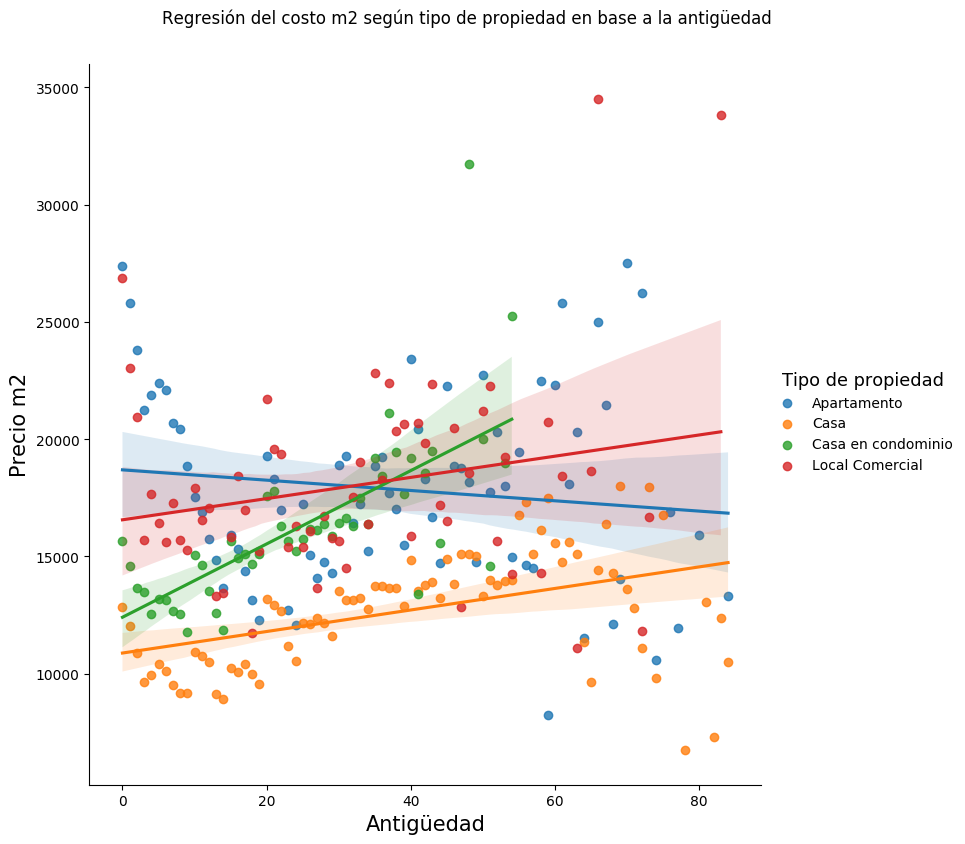

In [325]:
# Veamos si podemos analizar la variacion del precio por mt2 acorde a la antiguedad. Para esto filtraremos los de antiguedad
# nulo
habitables = ['Casa', 'Casa en condominio', 'Apartamento', 'Local Comercial']
dfAntiguedad = df[(~ df["antiguedad"].isnull()) & (df["tipodepropiedad"].isin(habitables))]
dfAntiguedad['tipodepropiedad'].cat.remove_unused_categories(inplace=True)
dfAntiguedad = dfAntiguedad.groupby(['antiguedad', 'tipodepropiedad']).agg(prom_precio_mt2=('precio_m2', 'mean')).reset_index()

# dfAntiguedad.provincia.value_counts()
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
# f, ax = plt.subplots(figsize=(15, 15))
# sns.despine(f, left=True, bottom=True)
# clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
# sns.scatterplot(x="antiguedad", y="precio_m2",
#                 hue="provincia",
#                 sizes=(1, 8), linewidth=0,
#                 data=dfAntiguedad, ax=ax)

ax = sns.lmplot(x="antiguedad", y="prom_precio_mt2", data=dfAntiguedad, hue="tipodepropiedad", height=8, truncate=True);
ax.set(xlabel='Antigüedad', ylabel='Precio m2')

new_title = 'Tipo de propiedad'
ax._legend.set_title(new_title)
ax.fig.suptitle('Regresión del costo m2 según tipo de propiedad en base a la antigüedad', y= 1.05)

Text(0.5, 1.05, 'Regresión del costo m2 según tipo de propiedad en base a la antigüedad \n (Ultimos 10 años)')

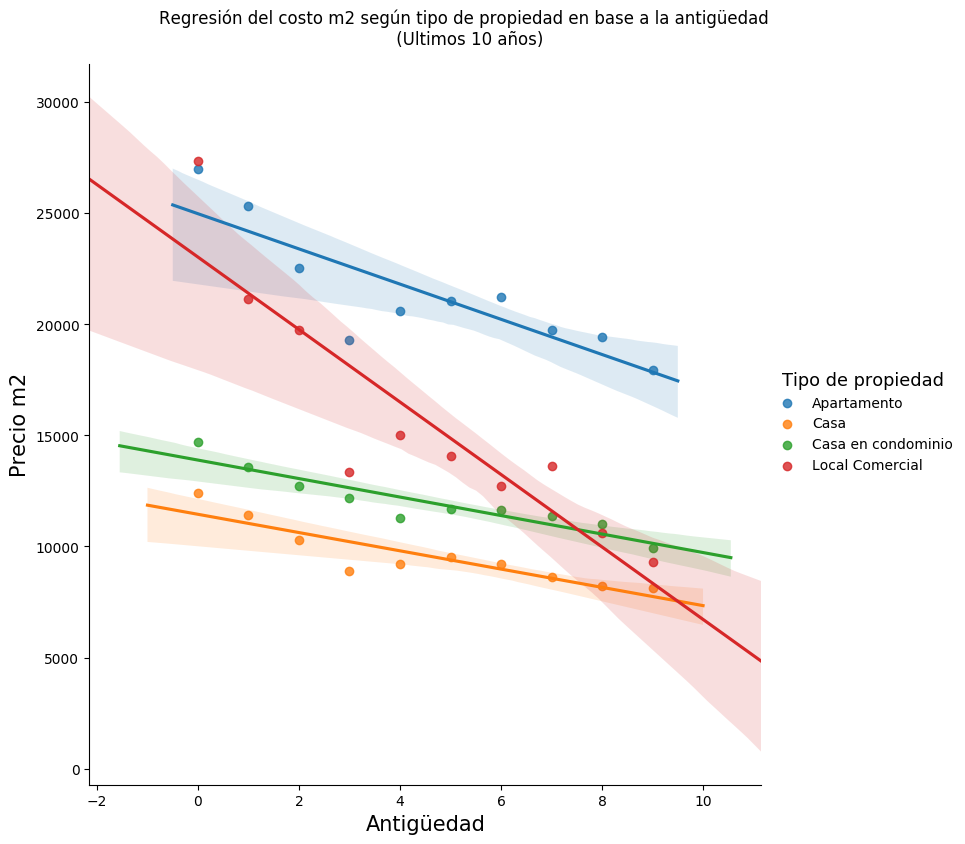

In [327]:
# Pero nos damos cuenta que no hay suficiente informacion en publicaciones mayores a 30 anños de antiguedad

habitables = ['Casa', 'Casa en condominio', 'Apartamento', 'Local Comercial']
dfAntiguedad = df[(~ df["antiguedad"].isnull()) & (df["antiguedad"] < 10) & (df["tipodepropiedad"].isin(habitables)) ]

# dfAntiguedad.tipodepropiedad.value_counts()
dfAntiguedad['tipodepropiedad'].cat.remove_unused_categories(inplace=True)
dfAntiguedad = dfAntiguedad.groupby(['antiguedad', 'tipodepropiedad']).agg(prom_precio_mt2=('precio_m2', 'median')).reset_index()


ax = sns.lmplot(x="antiguedad", y="prom_precio_mt2", data=dfAntiguedad, hue="tipodepropiedad", height=8);

ax.set(xlabel='Antigüedad', ylabel='Precio m2')

new_title = 'Tipo de propiedad'
ax._legend.set_title(new_title)
ax.fig.suptitle('Regresión del costo m2 según tipo de propiedad en base a la antigüedad \n (Ultimos 10 años)', y= 1.05)




In [299]:
habitables = ['Casa', 'Casa en condominio', 'Apartamento', 'Local Comercial']

dfAntiguedad = df[(~ df["antiguedad"].isnull()) & (df["antiguedad"] < 10) & (df["tipodepropiedad"].isin(habitables))]
dfAntiguedad.provincia.value_counts()

Distrito Federal         18978
Edo. de México           15581
Jalisco                  11216
Querétaro                10048
Puebla                    5927
Nuevo León                5789
Yucatán                   4078
Morelos                   3743
San luis Potosí           3285
Veracruz                  2887
Quintana Roo              2574
Baja California Norte     2012
Coahuila                  1920
Hidalgo                   1773
Chihuahua                 1719
Guanajuato                1467
Sonora                    1364
Guerrero                  1321
Baja California Sur       1298
Tamaulipas                1249
Durango                   1095
Michoacán                 1001
Sinaloa                    855
Aguascalientes             822
Chiapas                    629
Nayarit                    583
Tlaxcala                   537
Colima                     517
Tabasco                    509
Oaxaca                     327
Campeche                    95
Zacatecas                   42
Name: pr

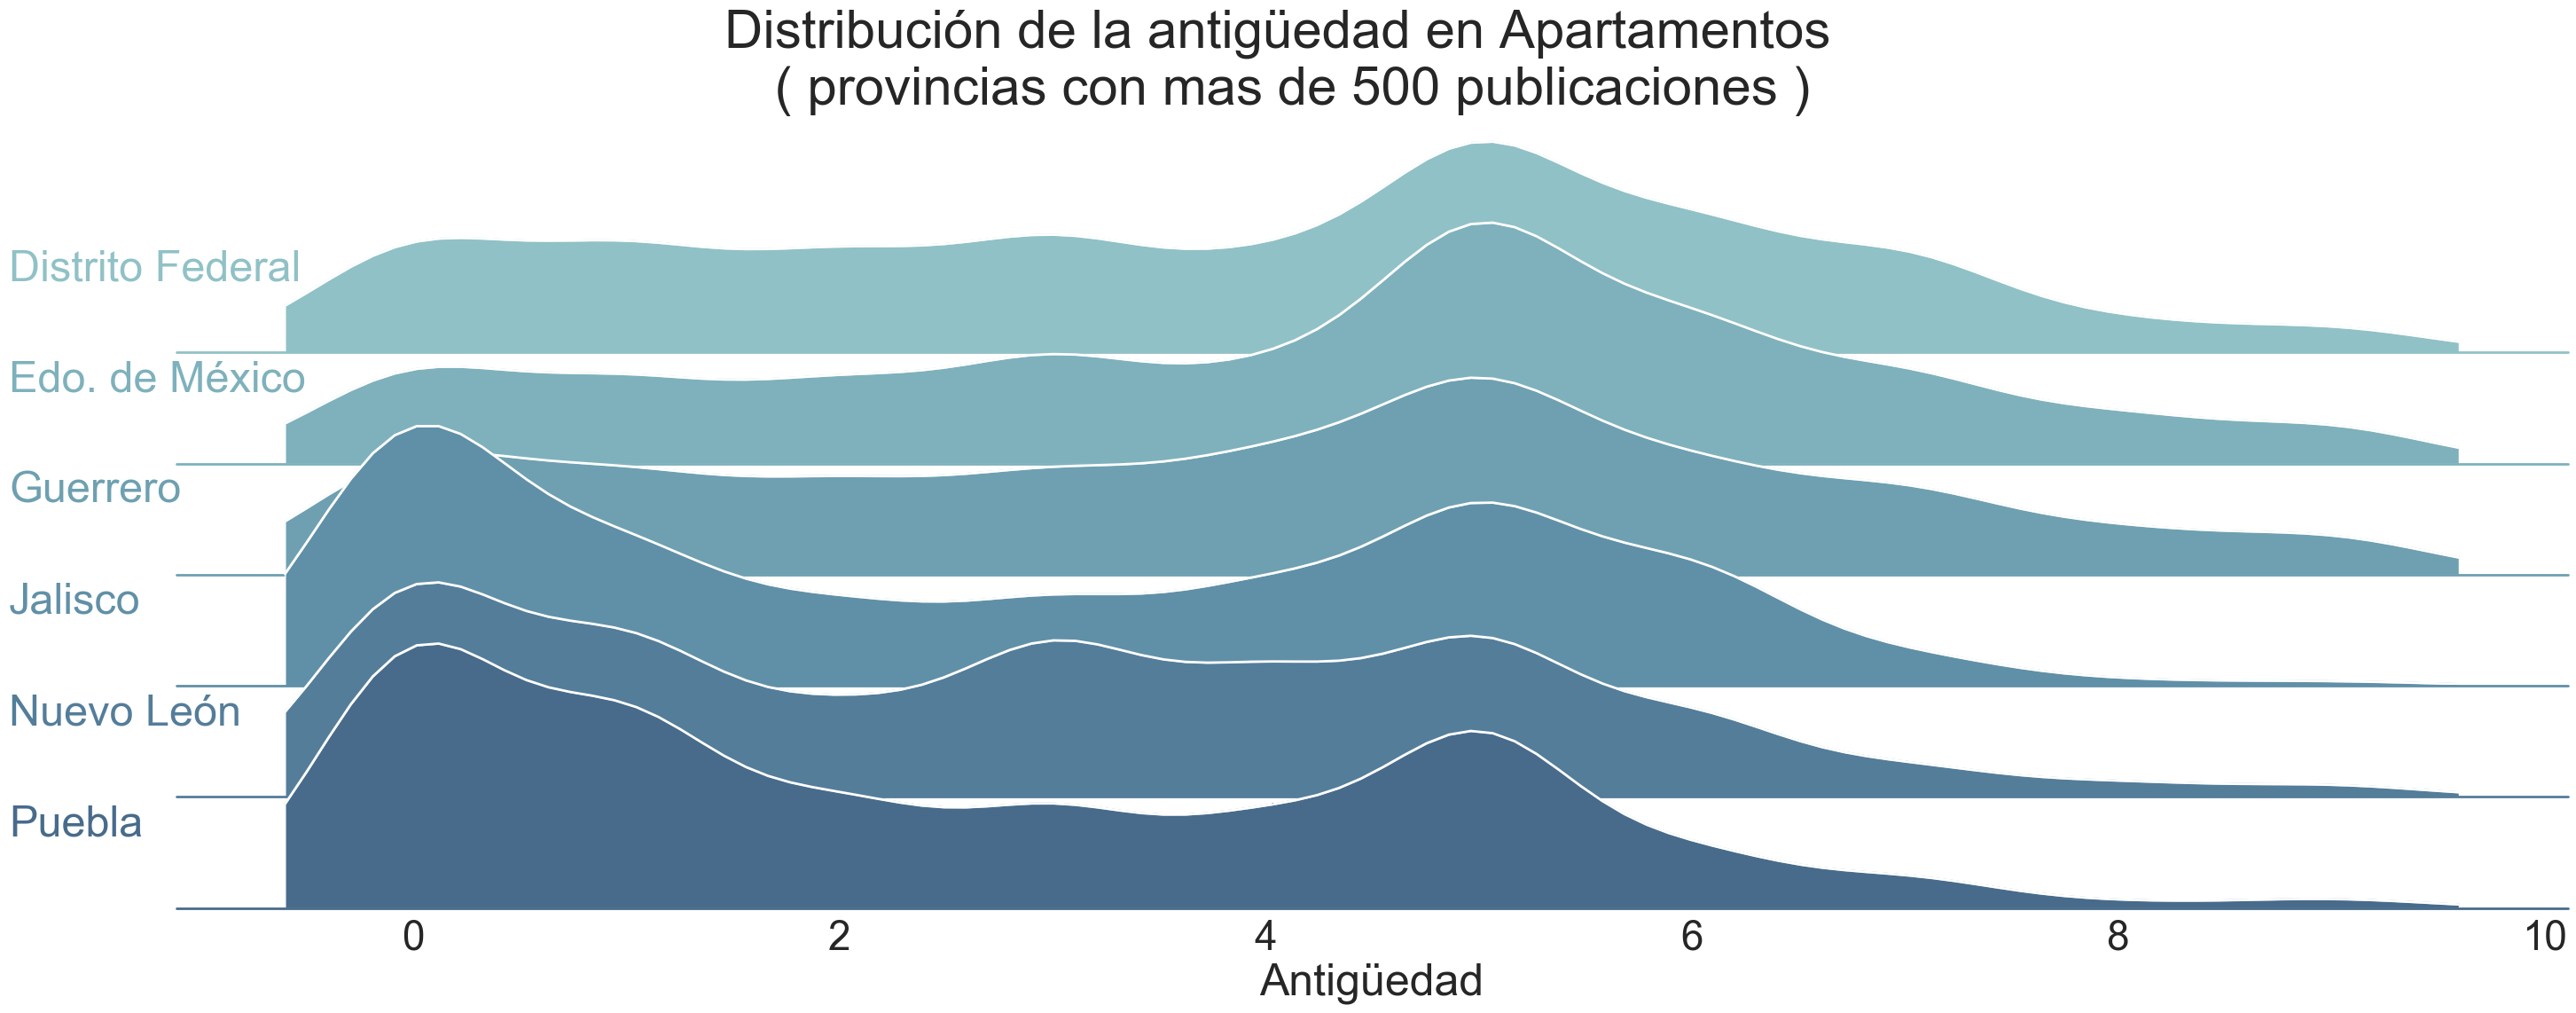

In [342]:
# Vemos la tendencia a nivel general en Mexico para poder analizar las provincias veamos las distribuciones

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=3)

habitables = ['Apartamento']

dfAntiguedad = df[(~ df["antiguedad"].isnull()) & (df["antiguedad"] < 10) & (df["tipodepropiedad"].isin(habitables))]

dfAntiguedad = dfAntiguedad[dfAntiguedad['antiguedad'] < 10]
# dfAntiguedad.tipodepropiedad.value_counts()
dfAntiguedad['tipodepropiedad'].cat.remove_unused_categories(inplace=True)

provincias = dfAntiguedad.provincia.value_counts().reset_index()
provincias = provincias[provincias['provincia'] > 800]['index'].to_list()

dfAntiguedad = dfAntiguedad[dfAntiguedad['provincia'].isin(provincias)]
dfAntiguedad['provincia'].cat.remove_unused_categories(inplace=True)


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dfAntiguedad, row="provincia", hue="provincia", aspect=15, height=2, palette=pal)

# # Draw the densities in a few steps
g.map(sns.kdeplot, "antiguedad", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "antiguedad", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.07, 0.3, label, fontsize= 35, color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "antiguedad")

# # Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.6)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.fig.suptitle('Distribución de la antigüedad en Apartamentos \n ( provincias con mas de 500 publicaciones )')
g.set(xlabel='Antigüedad')


Text(0.5, 1.05, 'Regresión del costo m2 según en Apartamentos por provincia en base a la antigüedad \n (Ultimos 10 años)')

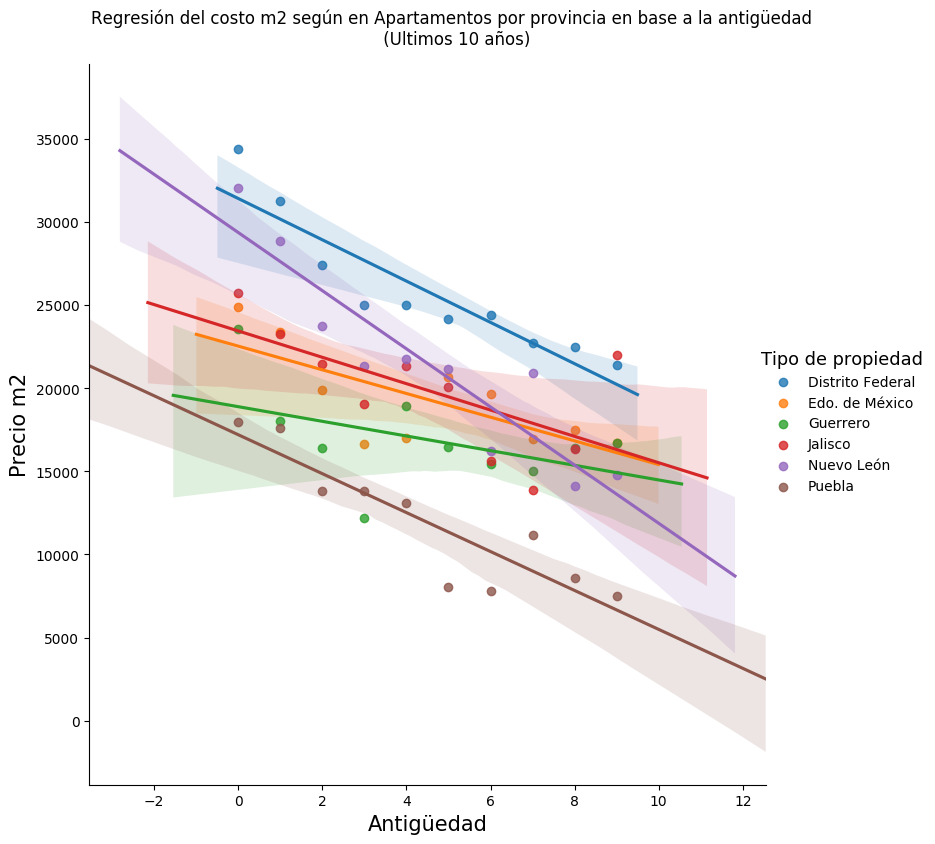

In [343]:
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams["axes.labelsize"] = 15
dfAntiguedadCasas = dfAntiguedad.groupby(['antiguedad', 'provincia']).agg(prom_precio_mt2=('precio_m2', 'median')).reset_index()

ax = sns.lmplot(x="antiguedad", y="prom_precio_mt2", data=dfAntiguedadCasas, hue="provincia", height=8);
ax.set(xlabel='Antigüedad', ylabel='Precio m2')

new_title = 'Tipo de propiedad'
ax._legend.set_title(new_title)

ax.fig.suptitle('Regresión del costo m2 según en Apartamentos por provincia en base a la antigüedad \n (Ultimos 10 años)', y= 1.05)



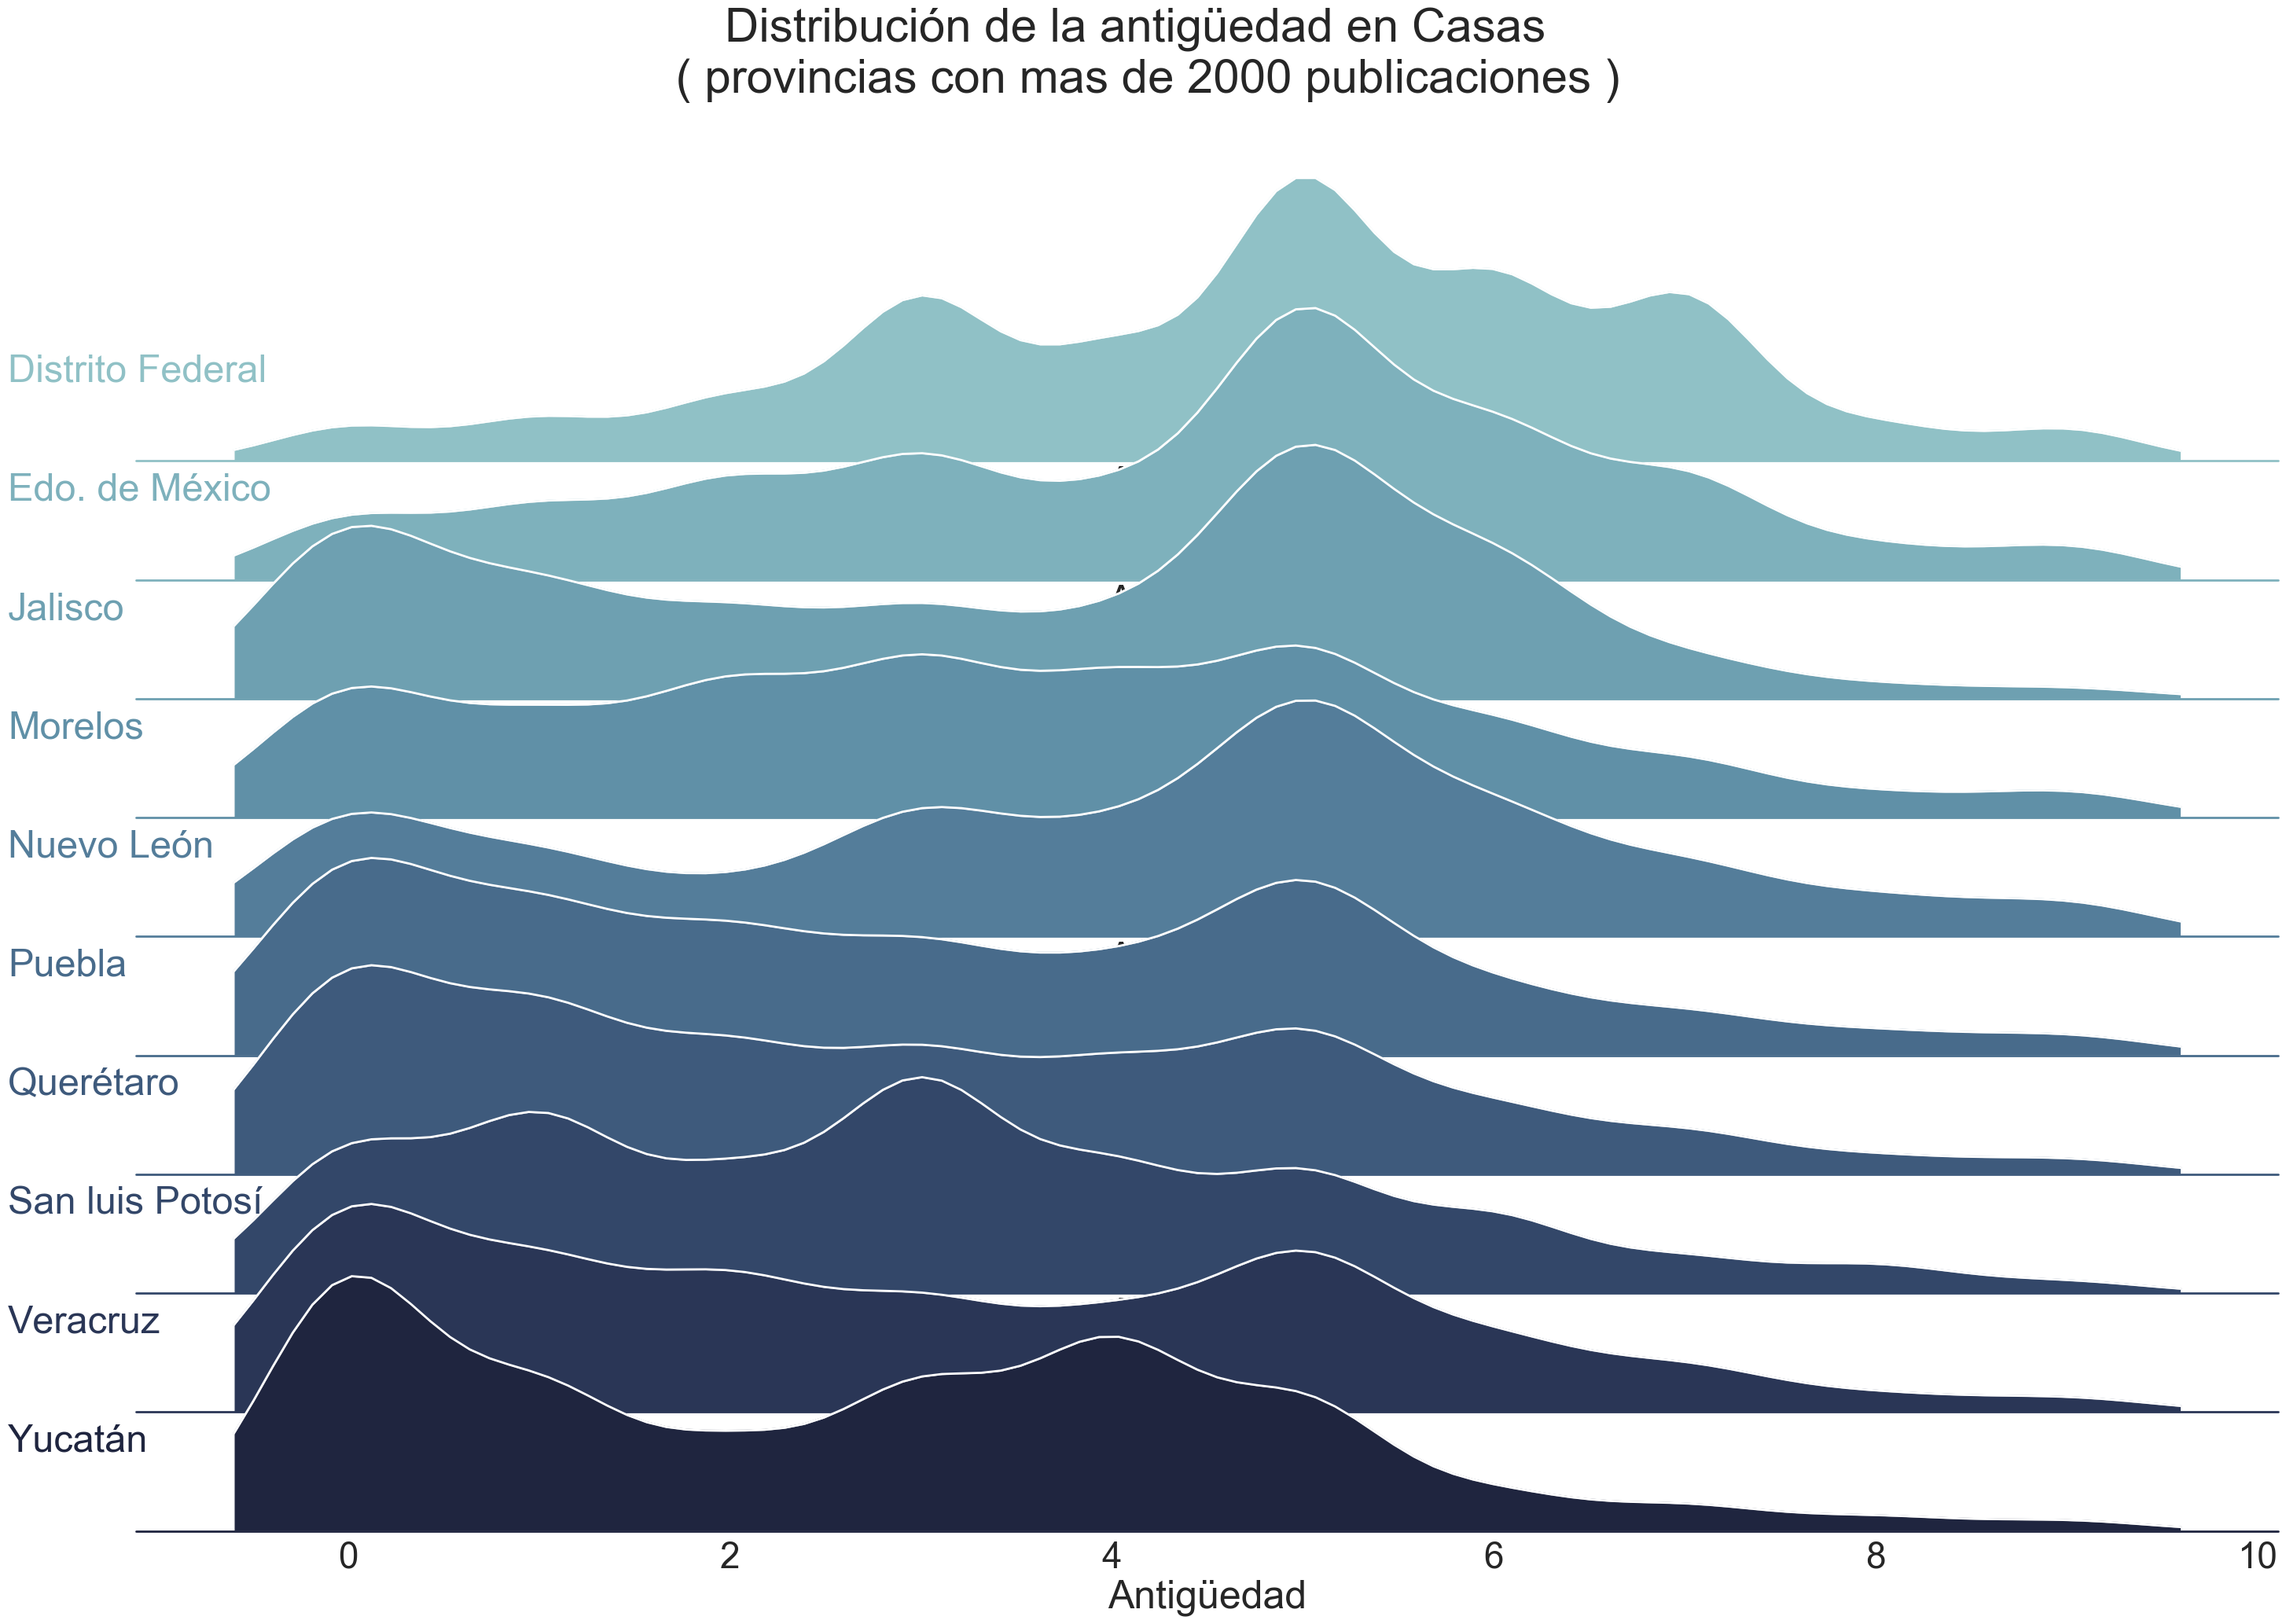

In [339]:
# Vemos la tendencia a nivel general en Mexico para poder analizar las provincias veamos las distribuciones

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=3)

habitables = ['Casa']

dfAntiguedad = df[(~ df["antiguedad"].isnull()) & (df["antiguedad"] < 10) & (df["tipodepropiedad"].isin(habitables))]

dfAntiguedad = dfAntiguedad[dfAntiguedad['antiguedad'] < 10]
# dfAntiguedad.tipodepropiedad.value_counts()
dfAntiguedad['tipodepropiedad'].cat.remove_unused_categories(inplace=True)

provincias = dfAntiguedad.provincia.value_counts().reset_index()
provincias = provincias[provincias['provincia'] > 2000]['index'].to_list()

dfAntiguedad = dfAntiguedad[dfAntiguedad['provincia'].isin(provincias)]
dfAntiguedad['provincia'].cat.remove_unused_categories(inplace=True)


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dfAntiguedad, row="provincia", hue="provincia", aspect=15, height=2, palette=pal)

# # Draw the densities in a few steps
g.map(sns.kdeplot, "antiguedad", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "antiguedad", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# # Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.06, 0.3, label, fontsize= 35, color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "antiguedad")

# # Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.6)

# # Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
g.fig.suptitle('Distribución de la antigüedad en Casas \n ( provincias con mas de 2000 publicaciones )', y= 1.05)
g.set(xlabel='Antigüedad')

Text(0.5, 1.05, 'Regresión del costo m2 según en Casas por provincia en base a la antigüedad \n (Ultimos 10 años)')

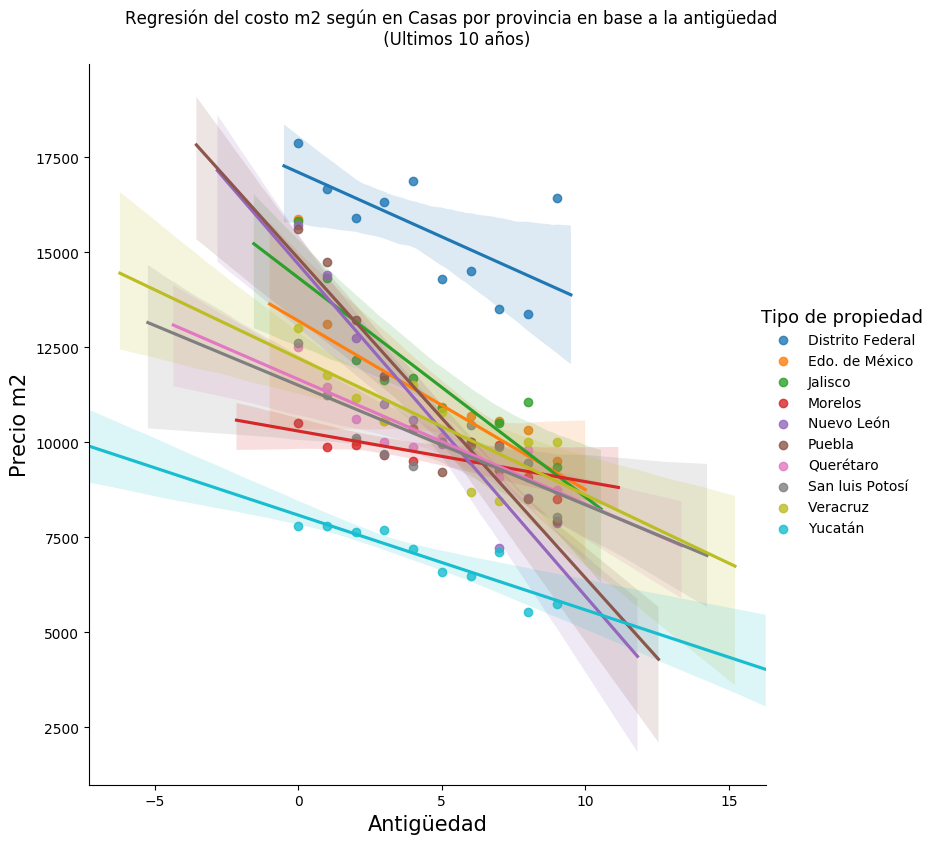

In [340]:
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams["axes.labelsize"] = 15
dfAntiguedadCasas = dfAntiguedad.groupby(['antiguedad', 'provincia']).agg(prom_precio_mt2=('precio_m2', 'median')).reset_index()

ax = sns.lmplot(x="antiguedad", y="prom_precio_mt2", data=dfAntiguedadCasas, hue="provincia", height=8);
ax.set(xlabel='Antigüedad', ylabel='Precio m2')
new_title = 'Tipo de propiedad'
ax._legend.set_title(new_title)
ax.fig.suptitle('Regresión del costo m2 según en Casas por provincia en base a la antigüedad \n (Ultimos 10 años)', y= 1.05)
